In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("Train_Clean.csv")
test  = pd.read_csv("Test_Clean.csv")
test_27 = pd.read_csv("Test_27_clean.csv")

In [4]:
train.shape

(6777, 50)

In [5]:
test.shape

(14498, 49)

In [14]:
test_27.shape

(14498, 50)

In [12]:
test_27.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'cases/1M', 'Deaths/1M', 'Age',
       'Coma score', 'Diuresis', 'Platelets', 'HBB', 'd-dimer', 'Heart rate',
       'HDL cholesterol', 'Charlson Index', 'Blood Glucose', 'Insurance',
       'salary', 'FT/month', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32'],
      dtype='object')

In [19]:
train.columns

Index(['Unnamed: 0', 'cases/1M', 'Deaths/1M', 'Age', 'Coma score', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary', 'FT/month',
       'Infect_Prob', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32'],
      dtype='object')

In [20]:
X_train = train[['cases/1M', 'Deaths/1M', 'Age', 'Coma score', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary', 'FT/month',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']].values
Y_train = train['Infect_Prob'].values

In [21]:
X_train[0]

array([2.00e+00, 0.00e+00, 6.80e+01, 8.00e+00, 4.41e+02, 1.54e+02,
       9.30e+01, 2.33e+02, 8.20e+01, 5.80e+01, 2.70e+01, 7.00e+00,
       3.60e+06, 1.30e+06, 2.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
       1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
       0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00])

In [22]:
X_test = test[['cases/1M', 'Deaths/1M', 'Age', 'Coma score', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary', 'FT/month',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']].values

In [23]:
X_test[0]

array([4.00e+00, 1.00e+00, 5.20e+01, 3.00e+00, 3.88e+02, 1.53e+02,
       1.96e+02, 2.40e+02, 8.50e+01, 5.30e+01, 1.70e+01, 3.00e+00,
       3.90e+06, 1.30e+06, 1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
       1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00])

In [24]:
X_test_27 = test_27[['cases/1M', 'Deaths/1M', 'Age', 'Coma score', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary', 'FT/month',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']].values

In [25]:
print(X_test.shape,X_train.shape,X_test_27.shape,Y_train.shape)

(14498, 48) (6777, 48) (14498, 48) (6777,)


In [26]:
Y_train[0]

49.13500977

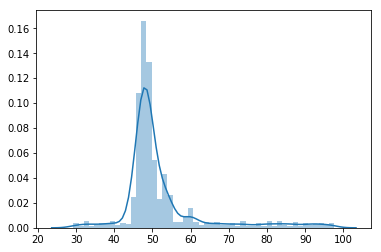

In [27]:
sns.distplot(Y_train)

### 1

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)

In [29]:
reg.score(X_train, Y_train)

0.29597580642812704

In [30]:
reg.coef_

array([ 2.53552038e-01,  1.14506314e+00, -1.46447616e-02,  1.51775428e-01,
        1.84271751e-03,  1.79621679e-02,  3.57010586e-03,  3.83178414e-03,
       -4.87198832e-03,  1.95321125e-02, -1.48245301e-02, -6.96343926e-02,
        1.62607821e-08, -6.50291000e-07, -4.64753528e-02,  9.00472971e-02,
       -9.00472971e-02, -9.00472971e-02,  9.00472971e-02,  5.60278709e+00,
       -5.60278709e+00, -2.30370226e+00,  6.98960154e-01,  1.60474210e+00,
       -1.33782206e-01, -1.86206610e-01,  3.79517336e-01,  3.59559608e-01,
       -1.30014645e+00, -3.59493524e-01,  1.52047506e-02,  6.61237373e-01,
        5.64109718e-01,  7.68391497e-02,  9.23892759e-02, -1.69228426e-01,
       -2.76672747e-02, -6.40037635e-02,  5.30430461e-03,  8.63667335e-02,
        7.79812050e-02, -1.43082790e-01, -1.16493648e-01,  1.81595233e-01,
        8.63667335e-02,  5.30430461e-03, -2.76672747e-02, -6.40037635e-02])

In [32]:
Y_test=reg.predict(X_test)

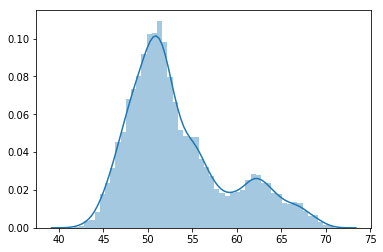

In [33]:
sns.distplot(Y_test)

In [34]:
Y_test_27=reg.predict(X_test_27)

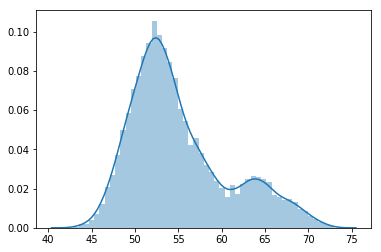

In [35]:
sns.distplot(Y_test_27)

### 2

In [17]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)
clf.score(X_train, Y_train)

0.9999999999977941

In [18]:
Y_test = clf.predict(X_test)

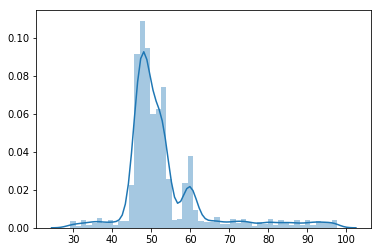

In [19]:
sns.distplot(Y_test)

In [ ]:
Y_test_27=reg.predict(X_test_27)

In [ ]:
sns.distplot(Y_test_27)

### 3

In [20]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

regr = AdaBoostRegressor(random_state=0, n_estimators=200)
regr.fit(X_train, Y_train)
regr.score(X_train, Y_train)

0.30567898718129183

In [21]:
Y_test =regr.predict(X_test)

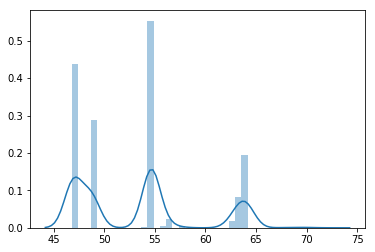

In [22]:
sns.distplot(Y_test)

### 4

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [24]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, Y_train)
mse = mean_squared_error(Y_train, clf.predict(X_train))
print("MSE: %.4f" % mse)


MSE: 62.3682


In [25]:
clf.score(X_train, Y_train)

0.4869782652915634

In [26]:
Y_test=clf.predict(X_test)

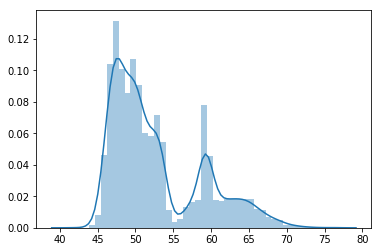

In [27]:
sns.distplot(Y_test)

### 5

In [37]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(    
                       hidden_layer_sizes=(128,256, 1024,128,64,32,16,8),
                       random_state=1,
                       activation="tanh",
                       max_iter=500)

In [38]:
reg.fit(X_train, Y_train)
reg.score(X_train, Y_train)

-2.5494455480057354e-07

In [39]:
Y_test=reg.predict(X_test)

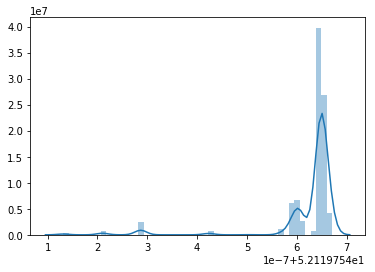

In [40]:
sns.distplot(Y_test)

### 6

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
regr = RandomForestRegressor(max_depth=100, random_state=0)

In [42]:
regr.fit(X_train, Y_train)
regr.score(X_train, Y_train)

0.8751408124500819

In [43]:
Y_test=regr.predict(X_test)

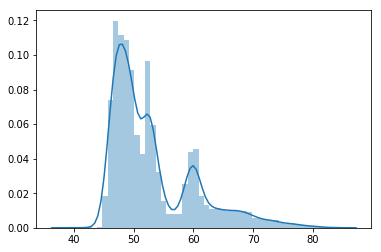

In [44]:
sns.distplot(Y_test)